## Project 3, Section A05, Group 4
Nicholas Milligan, Tonghua Liu, Matisse Tam

In [1]:
import scipy.integrate as si
import numpy as np
import matplotlib.pyplot as plt

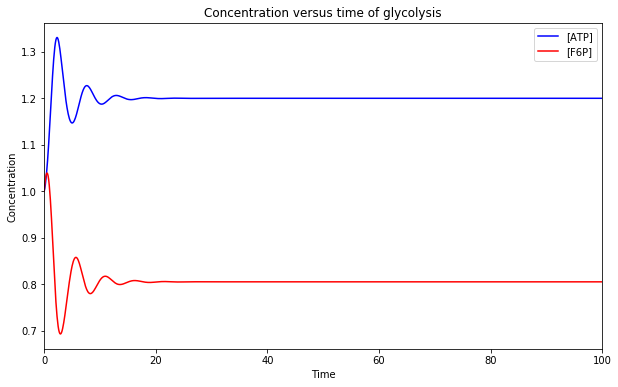

In [43]:
# define parameters
a=0.05
b=1.2
# let [ATP] = Ca & [F6P] = Cf
def fa(Ca,Cf,t): return -Ca + a*Cf + (Ca**2)*Cf
def ff(Ca,Cf,t): return b - a*Cf - (Ca**2)*Cf

# time range
h=0.1
t=np.arange(0,100+h,h)

# initialize solutions
Ca=np.zeros(t.shape)
Cf=np.zeros(t.shape)

# initial conditon at t=0
Ca[0]=1
Cf[0]=1

for i in range(len(t)-1):
    
    # RK4 substeps
    ka1=fa(Ca[i],Cf[i],t[i])
    kf1=ff(Ca[i],Cf[i],t[i])
    
    ka2=fa(Ca[i]+h*ka1/2,Cf[i]+h*kf1/2,t[i]+h/2)
    kf2=ff(Ca[i]+h*ka1/2,Cf[i]+h*kf1/2,t[i]+h/2)
    
    ka3=fa(Ca[i]+h*ka2/2,Cf[i]+h*kf2/2,t[i]+h/2)
    kf3=ff(Ca[i]+h*ka2/2,Cf[i]+h*kf2/2,t[i]+h/2)
    
    ka4=fa(Ca[i]+h*ka3,Cf[i]+h*kf3,t[i]+h/2)
    kf4=ff(Ca[i]+h*ka3,Cf[i]+h*kf3,t[i]+h/2)
    
    # weighted average
    ka=(ka1+2*ka2+2*ka3+ka4)/6
    kf=(kf1+2*kf2+2*kf3+kf4)/6
    
    # jump with modified average slope
    Ca[i+1]=Ca[i]+h*ka
    Cf[i+1]=Cf[i]+h*kf

plt.figure(figsize=(10,6))
#plt.subplot(211)
plt.plot(t,Ca,'b-',label='[ATP]')
plt.plot(t,Cf,'r-',label='[F6P]')
plt.title('Concentration versus time of glycolysis')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.xlim(0,100)
plt.legend()

Using a sensitivity analysis for various values of Ca0 and Cf0 it can be seen that the initial values do not alter the steady state value when the kinetic parameters (a and b) are constant. However, the 'path' to steady state does change.

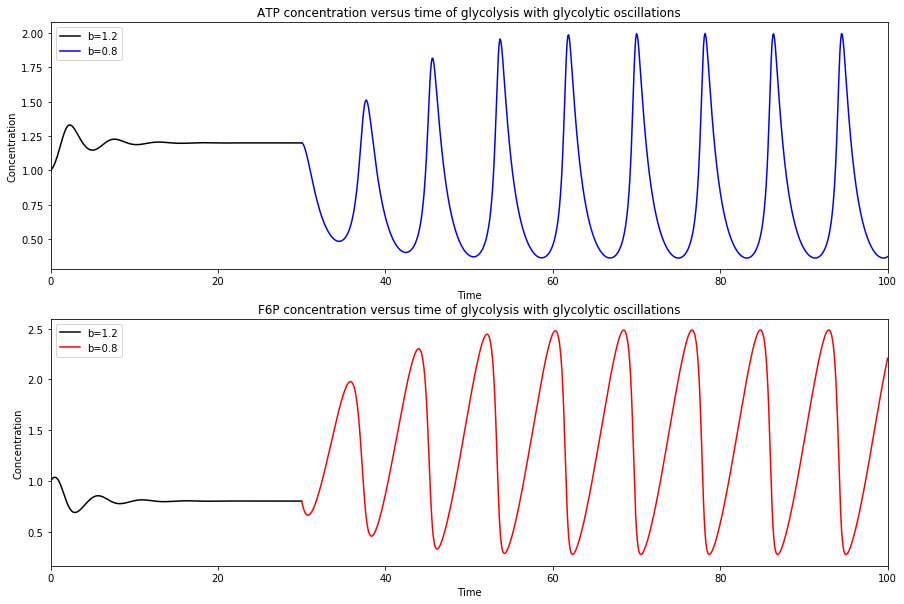

In [44]:
# define new parameters
b=0.8

# time range
h=0.1
t1=np.arange(30,100+h,h)
tt=np.arange(0,100+h,h)

# initialize solutions
Ca1=np.zeros(t1.shape)
Cf1=np.zeros(t1.shape)

# initial conditon at t=0
Ca1[0]=Ca[301]
Cf1[0]=Cf[301]

for i in range(len(t1)-1):
    
    # RK4 substeps
    ka11=fa(Ca1[i],Cf1[i],t1[i])
    kf11=ff(Ca1[i],Cf1[i],t1[i])
    
    ka22=fa(Ca1[i]+h*ka11/2,Cf1[i]+h*kf11/2,t1[i]+h/2)
    kf22=ff(Ca1[i]+h*ka11/2,Cf1[i]+h*kf11/2,t1[i]+h/2)
    
    ka33=fa(Ca1[i]+h*ka22/2,Cf1[i]+h*kf22/2,t1[i]+h/2)
    kf33=ff(Ca1[i]+h*ka22/2,Cf1[i]+h*kf22/2,t1[i]+h/2)
    
    ka44=fa(Ca1[i]+h*ka33,Cf1[i]+h*kf33,t1[i]+h/2)
    kf44=ff(Ca1[i]+h*ka33,Cf1[i]+h*kf33,t1[i]+h/2)
    
    # weighted average
    kaa=(ka11+2*ka22+2*ka33+ka44)/6
    kff=(kf11+2*kf22+2*kf33+kf44)/6
    
    # jump with modified average slope
    Ca1[i+1]=Ca1[i]+h*kaa
    Cf1[i+1]=Cf1[i]+h*kff

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(tt[0:301],Ca[0:301],'k-',label='b=1.2')
plt.plot(t1,Ca1,'b-',label='b=0.8')
plt.title('ATP concentration versus time of glycolysis with glycolytic oscillations')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.xlim(0,100)
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(tt[0:301],Cf[0:301],'k-',label='b=1.2')
plt.plot(t1,Cf1,'r-',label='b=0.8')
plt.title('F6P concentration versus time of glycolysis with glycolytic oscillations')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.xlim(0,100)
plt.legend(loc='upper left')
plt.show()

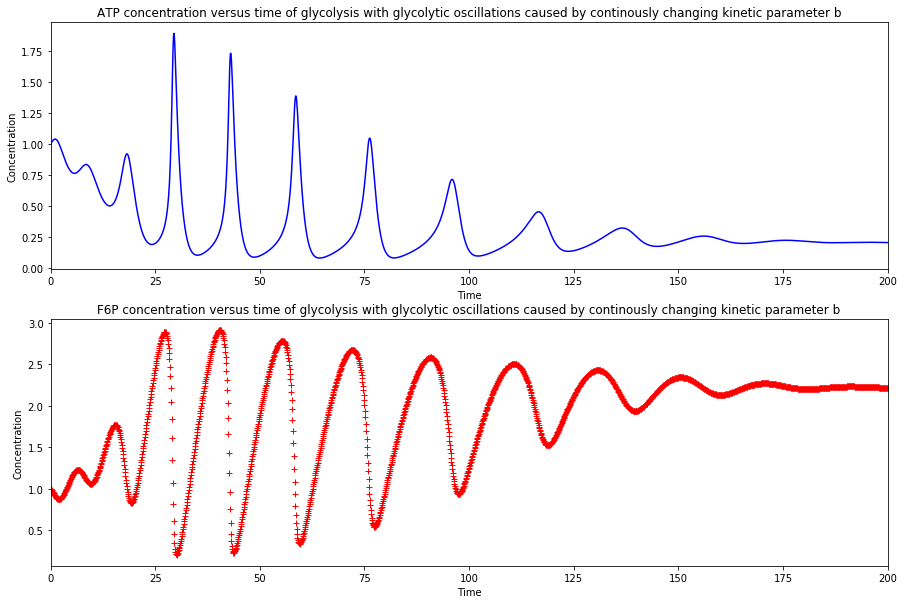

In [47]:
# let [ATP] = Ca & [F6P] = Cf
def fb(Ca,Cf,b,t3): return -0.1*Ca*Cf*np.exp(-1/b)
def fa1(Ca,Cf,b,t3): return -Ca + a*Cf + (Ca**2)*Cf
def ff1(Ca,Cf,b,t3): return b - a*Cf - (Ca**2)*Cf

# time range
h=0.1
t3=np.arange(0,200+h,h)

# initialize solutions
Ca2=np.zeros(t3.shape)
Cf2=np.zeros(t3.shape)
b=np.zeros(t3.shape)

# initial conditon at t=0
Ca2[0]=1
Cf2[0]=1
b[0]=1

for i in range(len(t3)-1):
    
    # RK4 substeps
    ka111=fa1(Ca2[i],Cf2[i],b[i],t3[i])
    kf111=ff1(Ca2[i],Cf2[i],b[i],t3[i])
    kb1=fb(Ca2[i],Cf2[i],b[i],t3[i])
    
    ka222=fa1(Ca2[i]+h*ka11/2,Cf2[i]+h*kf11/2,b[i]+h*kb1/2,t3[i]+h/2)
    kf222=ff1(Ca2[i]+h*ka11/2,Cf2[i]+h*kf11/2,b[i]+h*kb1/2,t3[i]+h/2)
    kb2=fb(Ca2[i]+h*ka11/2,Cf2[i]+h*kf11/2,b[i]+h*kb1/2,t3[i]+h/2)
    
    ka333=fa1(Ca2[i]+h*ka222/2,Cf2[i]+h*kf222/2,b[i]+h*kb2/2,t3[i]+h/2)
    kf333=ff1(Ca2[i]+h*ka222/2,Cf2[i]+h*kf222/2,b[i]+h*kb2/2,t3[i]+h/2)
    kb3=fb(Ca2[i]+h*ka222/2,Cf2[i]+h*kf222/2,b[i]+h*kb2/2,t3[i]+h/2)
    
    ka444=fa1(Ca2[i]+h*ka333,Cf2[i]+h*kf333,b[i]+h*kb3,t3[i]+h/2)
    kf444=ff1(Ca2[i]+h*ka333,Cf2[i]+h*kf333,b[i]+h*kb3,t3[i]+h/2)
    kb4=fb(Ca2[i]+h*ka333,Cf2[i]+h*kf333,b[i]+h*kb3,t3[i]+h/2)
    
    # weighted average
    kaaa=(ka111+2*ka222+2*ka333+ka444)/6
    kfff=(kf111+2*kf222+2*kf333+kf444)/6
    kb=(kb1+2*kb2+2*kb3+kb4)/6
    
    # jump with modified average slope
    Ca2[i+1]=Ca2[i]+h*kaaa
    Cf2[i+1]=Cf2[i]+h*kfff
    b[i+1]=b[i]+h*kb
    
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t3,Ca2,'b-')
plt.title('ATP concentration versus time of glycolysis with glycolytic oscillations caused by continously changing kinetic parameter b')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.xlim(0,200)

plt.subplot(212)
plt.plot(t3,Cf2,'r+')
plt.title('F6P concentration versus time of glycolysis with glycolytic oscillations caused by continously changing kinetic parameter b')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.xlim(0,200)
plt.show()

